In [2]:
pip install Tweepy


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Hidden for privacy purpose
consumerKey = "X" 
consumerSecret= "X"
accessToken = "X"
accessTokenSecret = "X"

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="realDonaldTrump", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Show the 5 recent tweets:

1) LAW &amp; ORDER!

2) Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

3) https://t.co/hJSsx86Azp

4) RT @realDonaldTrump: .@MayorBowser is grossly incompetent, and in no way qualified to be running an important city like Washington, D.C. If…

5) RT @realDonaldTrump: I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back h…



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,LAW &amp; ORDER!
1,Wow! 96% Approval Rating in the Republican Par...
2,https://t.co/hJSsx86Azp
3,RT @realDonaldTrump: .@MayorBowser is grossly ...
4,RT @realDonaldTrump: I am a big fan of Drew Br...


In [6]:

def cleanTxt(text):
     text = re.sub('@[A-Za-z0–9]+', '', text)
     text = re.sub('#', '', text) 
     text = re.sub('RT[\s]+', '', text) # Removing RT
     text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
     return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,LAW &amp; ORDER!
1,Wow! 96% Approval Rating in the Republican Par...
2,
3,": . is grossly incompetent, and in no way qual..."
4,: I am a big fan of Drew Brees. I think he’s t...
...,...
95,: The president should use the Insurrection Ac...
96,": We should have zero tolerance for anarchy, r..."
97,: Judge Sullivan is abusing his judicial power...
98,: The carnage caused by domestic terrorists an...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,LAW &amp; ORDER!,0.000000,0.000000
1,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500
2,,0.000000,0.000000
3,": . is grossly incompetent, and in no way qual...",0.683333,0.025000
4,: I am a big fan of Drew Brees. I think he’s t...,0.366667,0.333333
...,...,...,...
95,: The president should use the Insurrection Ac...,0.050000,-0.050000
96,": We should have zero tolerance for anarchy, r...",1.000000,0.000000
97,: Judge Sullivan is abusing his judicial power...,0.300000,0.025000
98,: The carnage caused by domestic terrorists an...,0.325000,0.041667


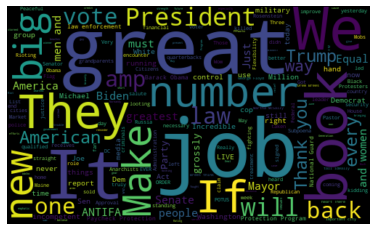

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score <= 0:
      return 'Negative'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,LAW &amp; ORDER!,0.000000,0.000000,Negative
1,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500,Positive
2,,0.000000,0.000000,Negative
3,": . is grossly incompetent, and in no way qual...",0.683333,0.025000,Positive
4,: I am a big fan of Drew Brees. I think he’s t...,0.366667,0.333333,Positive
...,...,...,...,...
95,: The president should use the Insurrection Ac...,0.050000,-0.050000,Negative
96,": We should have zero tolerance for anarchy, r...",1.000000,0.000000,Negative
97,: Judge Sullivan is abusing his judicial power...,0.300000,0.025000,Positive
98,: The carnage caused by domestic terrorists an...,0.325000,0.041667,Positive


In [12]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing positive tweets:

1) Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

2) : . is grossly incompetent, and in no way qualified to be running an important city like Washington, D.C. If…

3) : I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back h…

4) : ...We should be standing up straight and tall, ideally with a salute, or a hand on heart. There are other things you c…

5) : On June 6, 1944, our Greatest Generation bravely stormed the beaches of Normandy.

"Those who fought here won a future for…

6) Riot gear or military control is not necessary because ANTIFA &amp; other Wacko groups of Anarchists aren’t present to cause trouble. Incredible people. Thank you Maine! 

7) Great new book by  called “Nothing to Lose”. The Pastor is a winner and a great guy. Much can be learned from him. Buy the book. Make him a Big Deal Author!

8) : Past

In [13]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) LAW &amp; ORDER!

2) 

3) : “In short, give some credit to the government relief efforts, especially the Paycheck Protection Program, for bringing back…

4) : PPPworks 

5) : May saw the BIGGEST JOBS INCREASE EVER.
 
This jobs report serves as an emphatic reminder about the strength of …

6) 

7) “This is a flat out lie. They (the media) are making things up”    The Lamestream Media is out of control. It would be impossible to fully explain how dishonest they are!

8) Crazy! 

9) 11: Fact:

Robert Mueller’s office deleted 19,000 text messages between Lisa Page and her lover Peter Strzok

How is that no…

10) : .: Democrats Are 'Frantic' That The Black Vote Is Leaving Their Party 

"They try to do everything they can…

11) : NYC Construction Workers Use Excavator to Save Gucci Handbags, Other Valuable Items From Looters 

12) : British Prime Minister ‘No Choice’ But to Offer Citizenship to Almost 3 Million Hong Kong Citizens 

13) : CA Socialist/Dem party c

In [15]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

52.0

In [16]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

48.0

In [17]:
# Show the value counts
df['Analysis'].value_counts()

Positive    52
Negative    48
Name: Analysis, dtype: int64

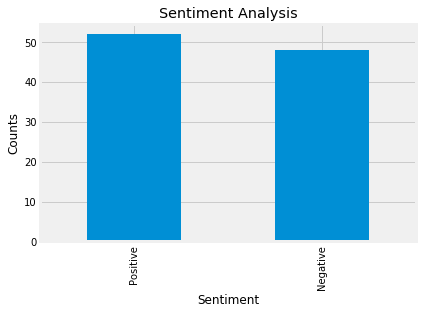

In [18]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()